In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [3]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [4]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

In [5]:
Image.open('desktop/11.jpeg')

FileNotFoundError: [Errno 2] No such file or directory: 'desktop/11.jpeg'

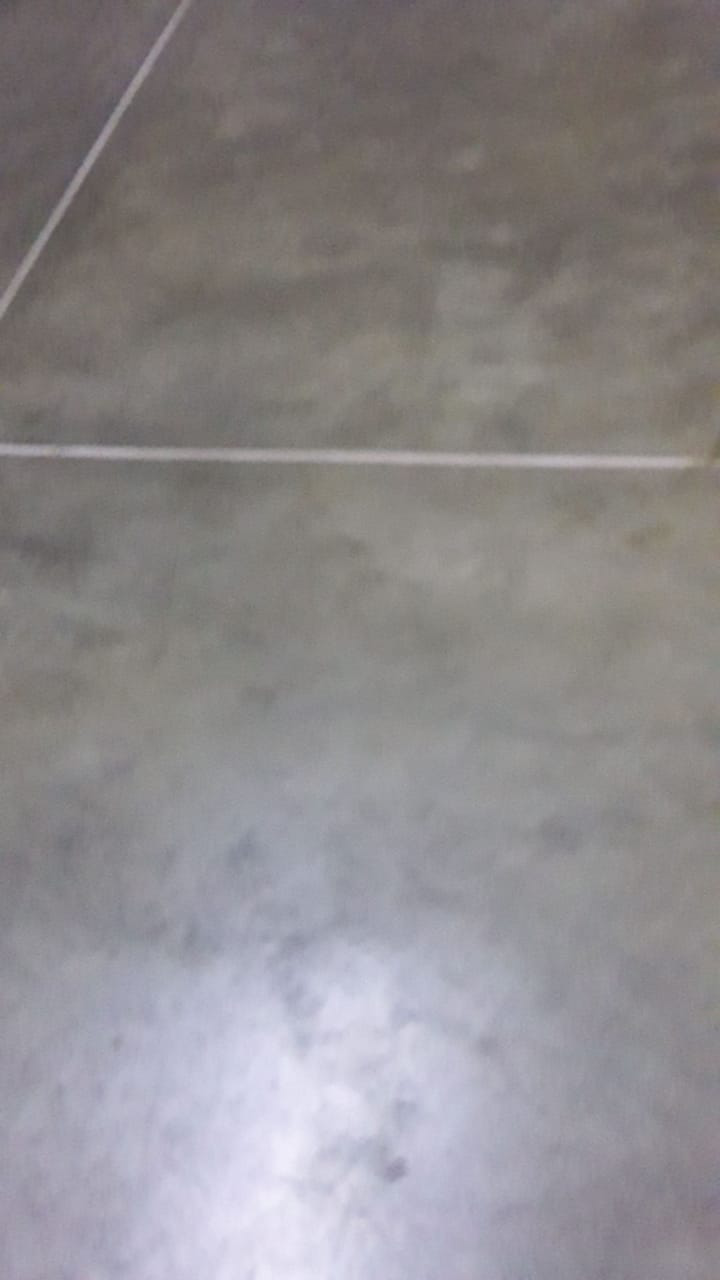

In [10]:
Image.open('/home/dell/Desktop/11.jpeg')


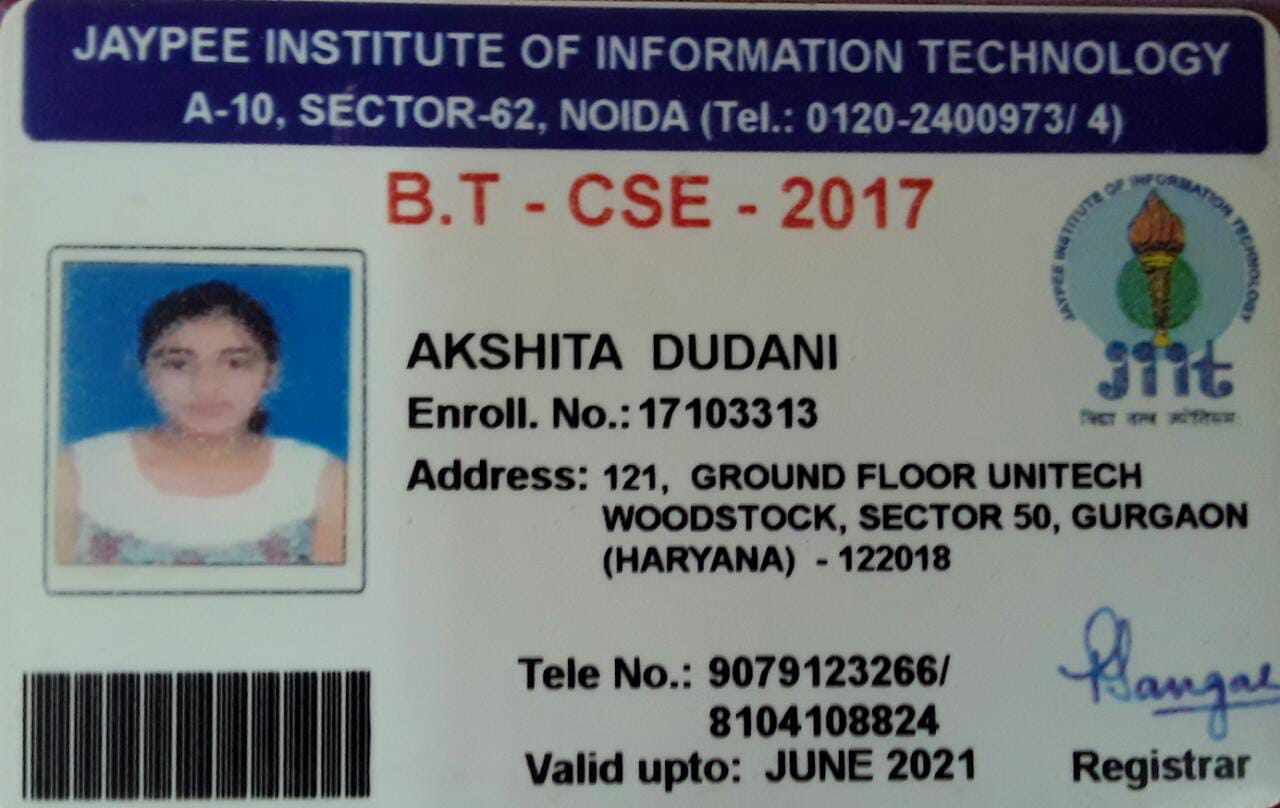

In [6]:
Image.open('/home/dell/Desktop/idcard.jpg')


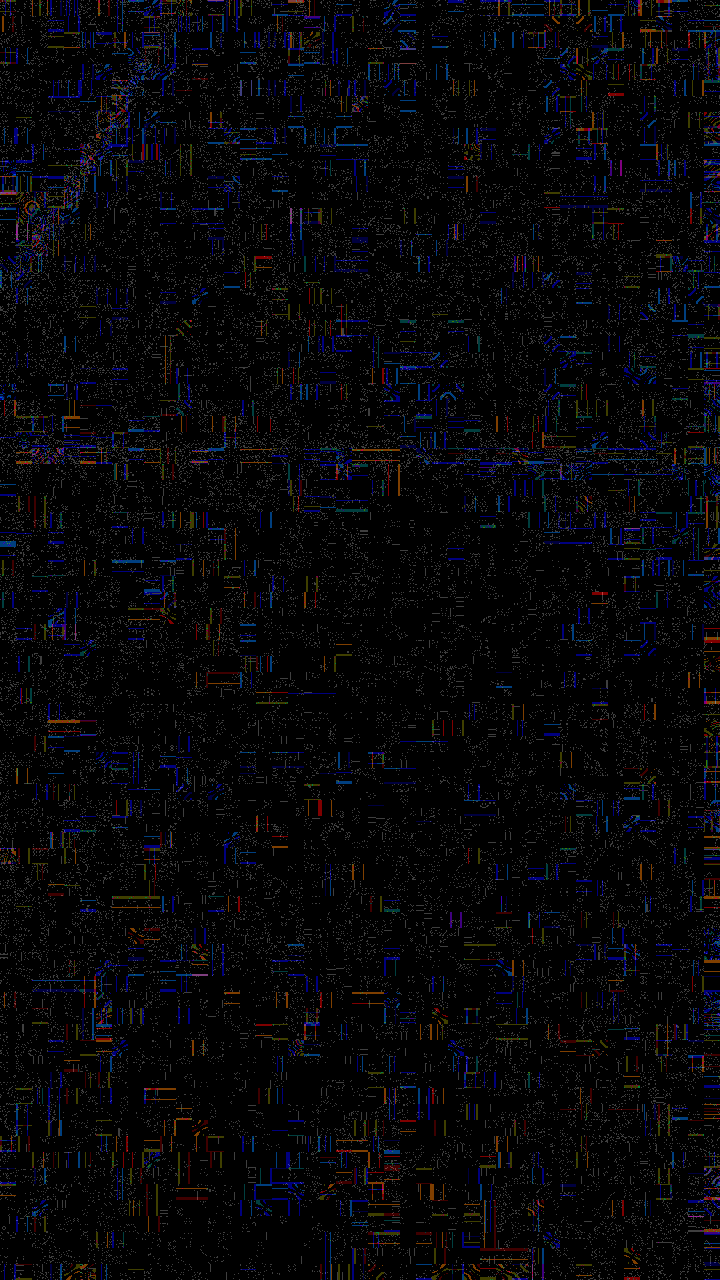

In [6]:
convert_to_ela_image('/home/dell/Desktop/11.jpeg', 90)

In [13]:
#Image.open('/home/dell/Desktop/1.jpg')

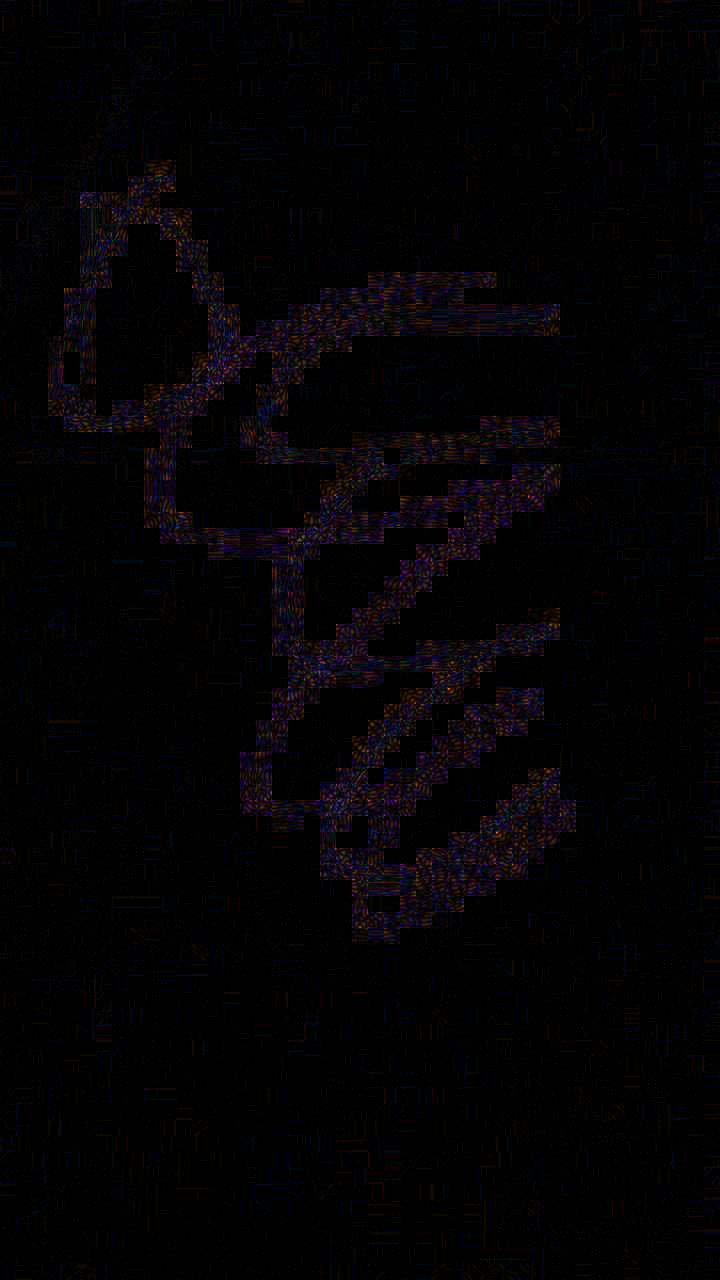

In [7]:
convert_to_ela_image('/home/dell/Desktop/12.jpeg', 90)

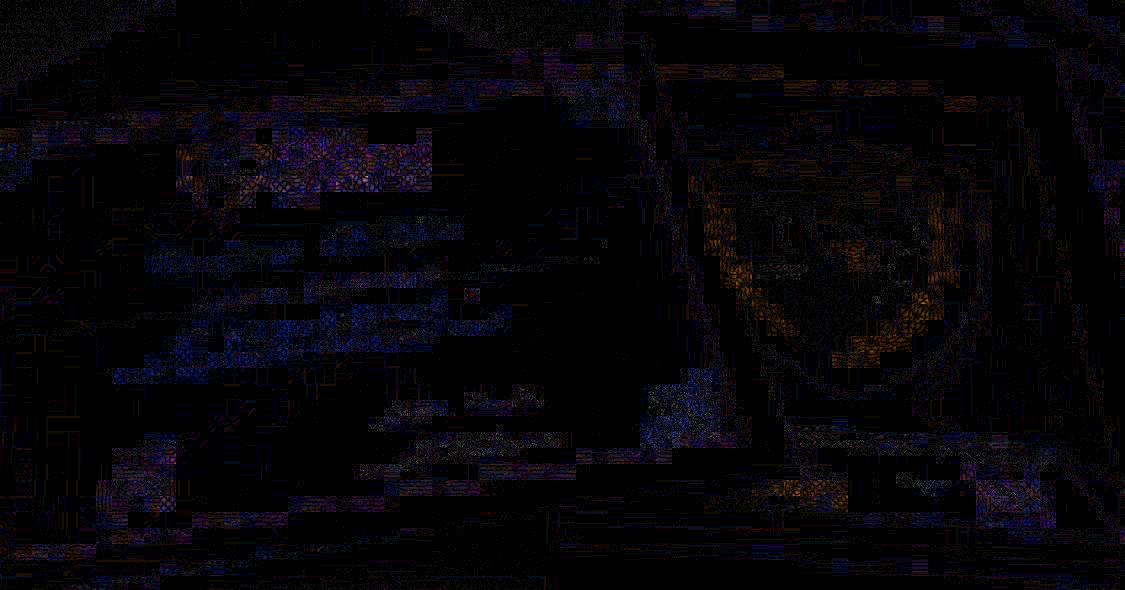

In [10]:
convert_to_ela_image('/home/dell/Desktop/1.jpg', 90)

In [8]:
#convert_to_ela_image('/home/dell/Desktop/3.jpg', 90)

In [9]:
#Image.open('/home/dell/Desktop/fake.jpg')

In [10]:
#Image.open('/home/dell/Desktop/fake.jpg')

In [11]:
#Image.open('/home/dell/Desktop/idcard.jpg')


In [12]:
#Image.open('/home/dell/Desktop/fake.jpg')

In [7]:
Image.open('/home/dell/Desktop/1.jpg')1

SyntaxError: invalid syntax (<ipython-input-7-0a68eda7f7db>, line 1)

In [13]:
#convert_to_ela_image('/home/dell/Desktop/1.jpg', 90)

In [14]:
dataset = pd.read_csv('trainfinal.csv')
dataset

,/home/dell/Image-Forgery-Detection-master/image_dataset/fake/cattle_1_trim_alpha.png,1
0,/home/dell/Image-Forgery-Detection-master/imag...,1
1,/home/dell/Image-Forgery-Detection-master/imag...,1
2,/home/dell/Image-Forgery-Detection-master/imag...,1
3,/home/dell/Image-Forgery-Detection-master/imag...,1
4,/home/dell/Image-Forgery-Detection-master/imag...,1
5,/home/dell/Image-Forgery-Detection-master/imag...,1
6,/home/dell/Image-Forgery-Detection-master/imag...,1
7,/home/dell/Image-Forgery-Detection-master/imag...,1
8,/home/dell/Image-Forgery-Detection-master/imag...,1
9,/home/dell/Image-Forgery-Detection-master/imag...,1


In [8]:
X = []
Y = []

In [9]:
for index, row in dataset.iterrows():
    X.append(array(convert_to_ela_image(row[0], 90).resize((128, 128))).flatten() / 255.0)
    Y.append(row[1])

In [10]:
X = np.array(X)
Y = to_categorical(Y, 2)

In [11]:
X = X.reshape(-1, 128, 128, 3)

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))




Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 120, 120, 32)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Input:  (None, 128, 128, 3)
Output:  (None, 60, 60, 32)


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               29491456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [15]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

In [16]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
early_stopping = EarlyStopping(monitor='val_acc',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [18]:
epochs = 5
batch_size = 100

In [ ]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2, callbacks=[early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 82 samples, validate on 21 samples
Epoch 1/5
